# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [163]:
#install spacy in the current conda environment
!pip install spacy


In [164]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm

!pip install matplotlib


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------------- ---------------- 7.6/12.8 MB 42.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [165]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [166]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [167]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey but the sammies are pretty big",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like their popcorn chicken and crispy rice appetizers!,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and what type of vibe you are looking for. There are a lot of options.,I-696,1
4,4,2024-09-04 14:32:17,1,"You can book completely enclosed private study rooms in Shapiro, just go to the library website. AFAIK, there aren’t places in Hatcher (unless you have special access to certain areas) where you can privately speak out loud on a call because even the private carrels and group study areas are open at the top",sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of individuals.,Own-Resident-3837,-1


In [168]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [169]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [170]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [171]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [172]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [173]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [174]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

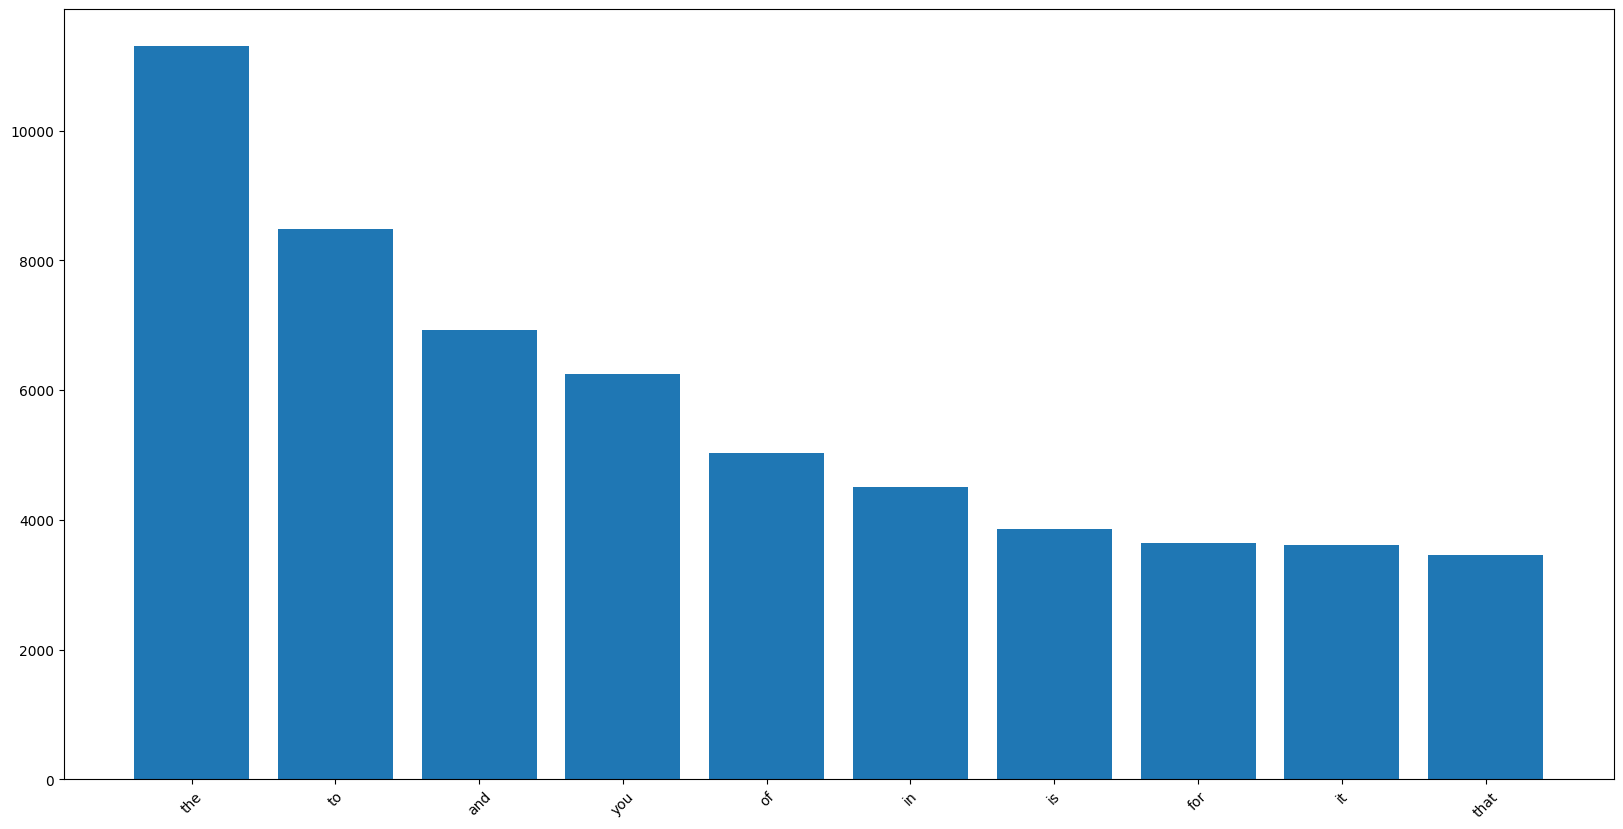

In [176]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: No, these all look like stop words. They dont really seem to have any relevance to Umich or the words that we care about.

#### Lemmatization and stopword removal

In [177]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [178]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [179]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [180]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [181]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [182]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

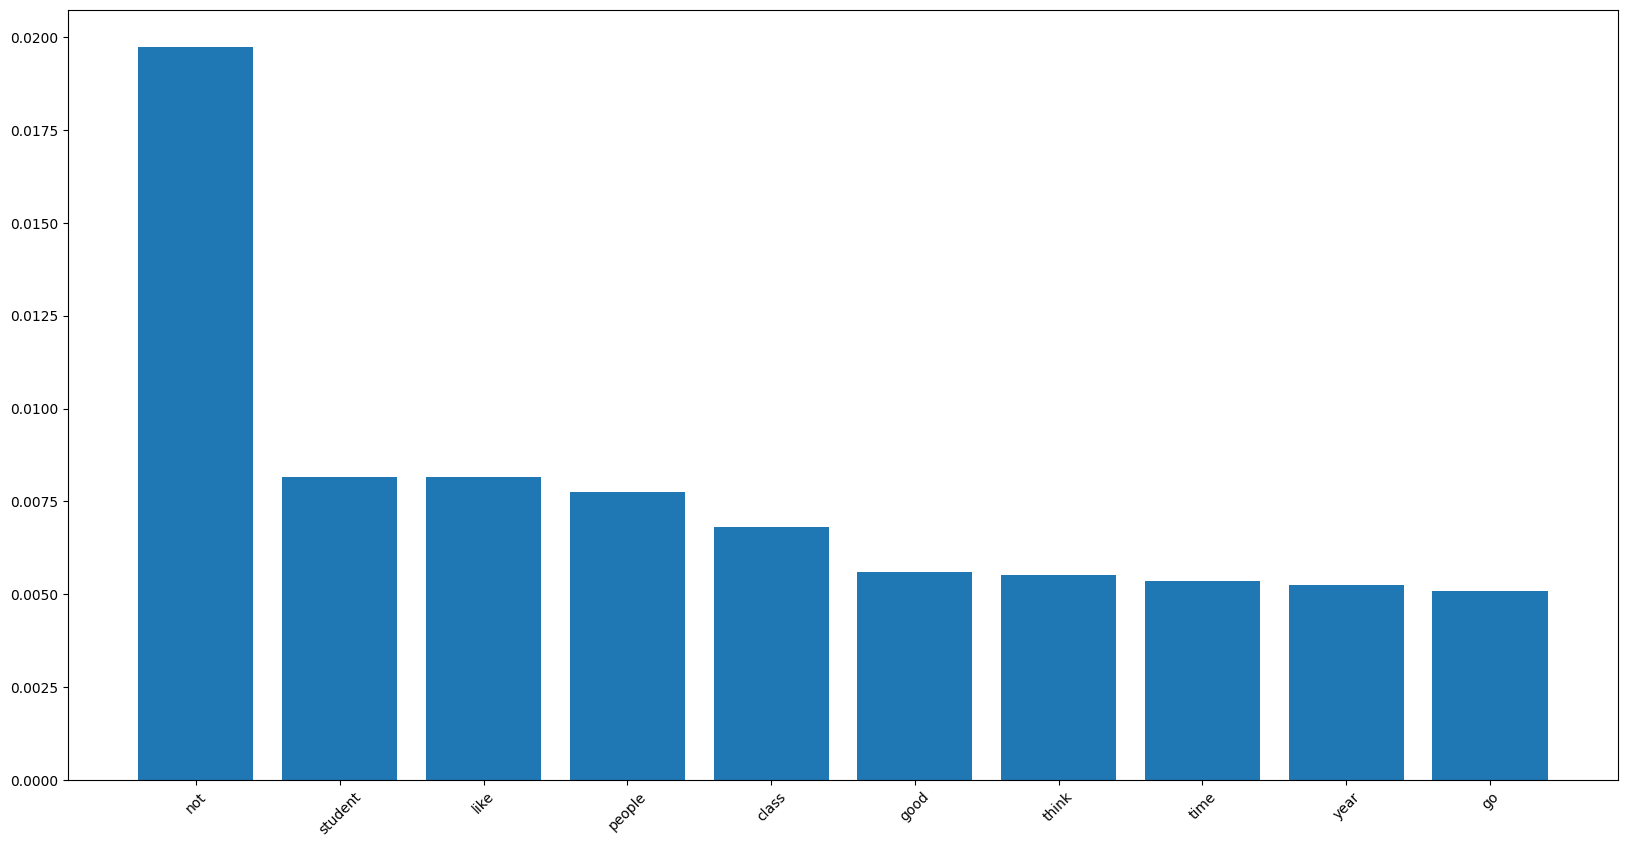

In [183]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [184]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

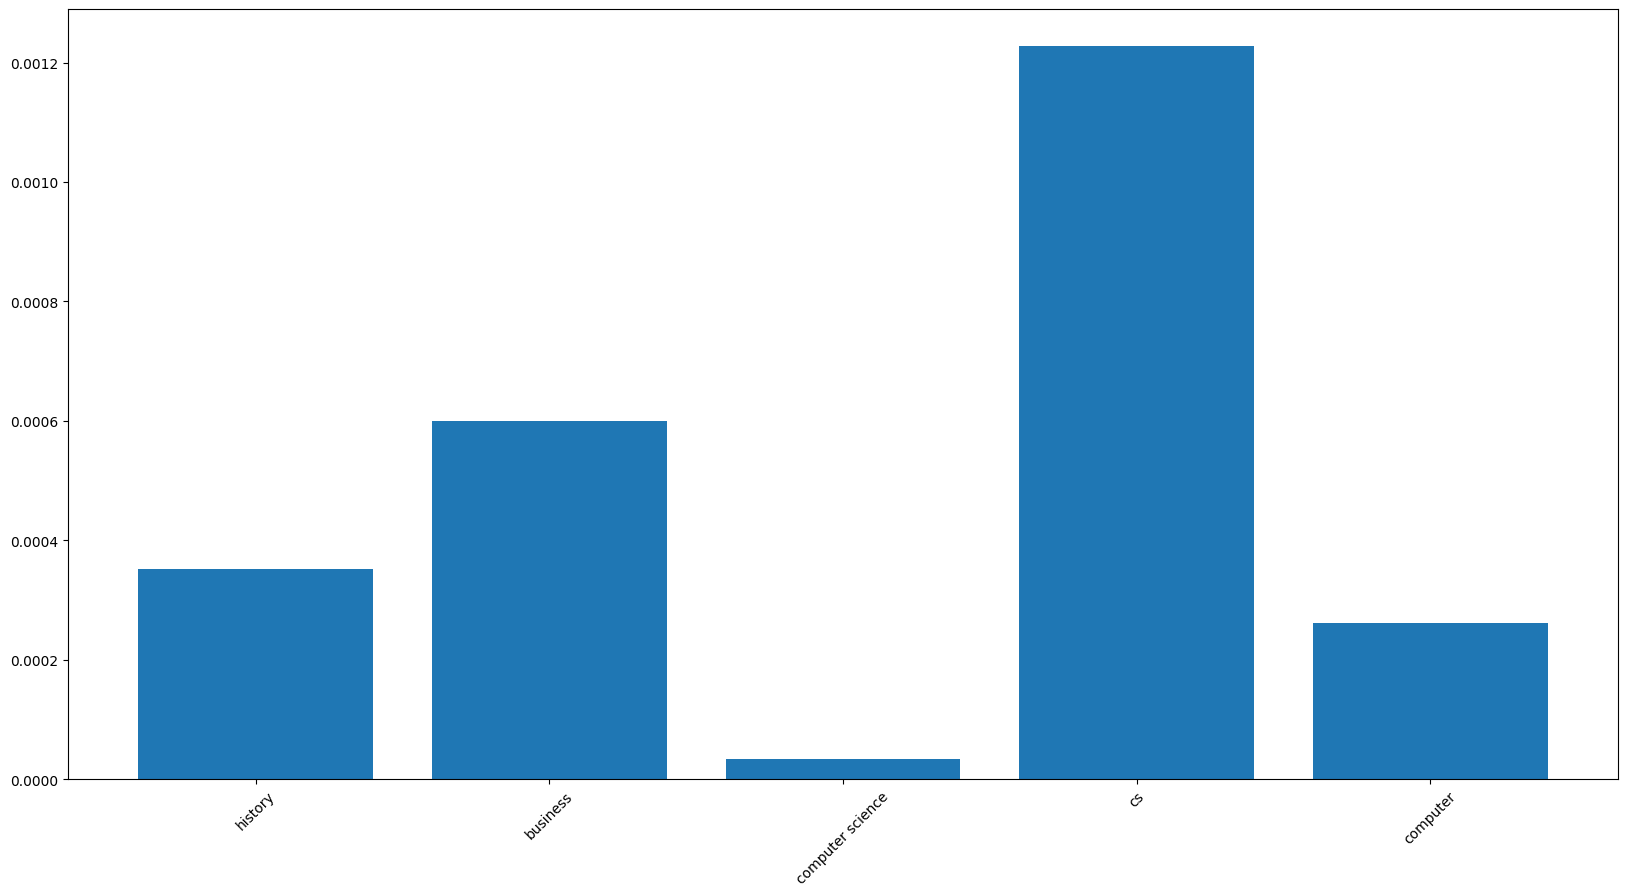

In [185]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [186]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

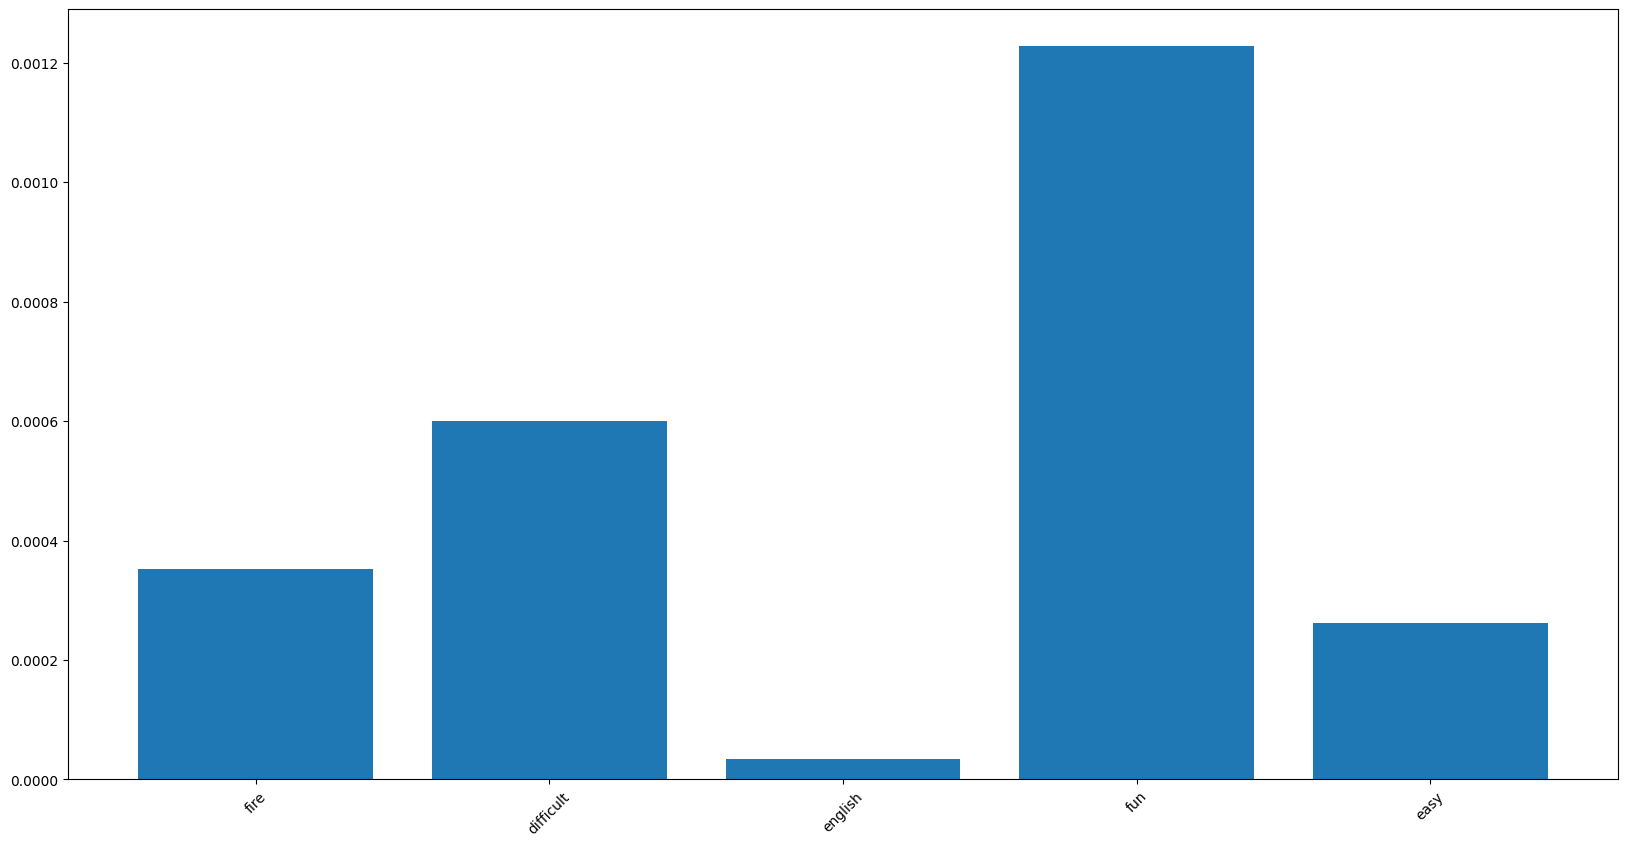

In [187]:
my_plot_list=word_counts[['fire','difficult','english','fun','easy']]
plt.figure(figsize=(20,10))
plt.bar(my_plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [188]:
uiuc=pd.read_csv("uiuc.csv")
uiuc




,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,"Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself \r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture",zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to request access?,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,"Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the ""front door"" of the residence hall with access to the dining hall.\r\n\r\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.",HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't occurred to me to do that.",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite fun even without drinking,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If you are a UIUC student, please contact our office at Off-Campus Community Living at [off-campuscommunityliving@illinois.edu](mailto:off-campuscommunityliving@illinois.edu) for resources to help you navigate these issues with your new apartment.",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup employs isn’t even a real business. When I had to move units across the hall a couple of years ago, we witnessed what their “cleaning” process looks like—it was a family of three (a mother and her teenage kids) who brought their lunch into the unit to eat while they wiped down the countertops and floors. The apartment was still absolutely filthy from the previous tenants when we got the keys. Fuck UGroup.",perpetuallytired29,3


In [189]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
print(uiuc.head())


   Unnamed: 0                 date  post_votes  \
0           0  2024-09-04 14:43:40           2   
1           1  2024-09-04 14:43:40           2   
2           2  2024-09-04 12:52:08           3   
3           3  2024-09-04 12:52:08           3   
4           4  2024-09-04 12:52:08           3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text  \
0                                                                                                                                                            Have the same professor! And in lecture he did say we were gonna have to l

In [190]:
vectorizer = CountVectorizer()
bag_of_words_uiuc = vectorizer.fit_transform(uiuc['cleaned_text'])
bag_of_words_uiuc

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [191]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df_uiuc = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())
bow_df_uiuc

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts_illini = bow_df_uiuc.sum()
#we can sort the values to see the most common words
word_counts_illini = word_counts_illini.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts_illini

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

In [193]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts_uiuc = bow_df_uiuc.sum()
#we can sort the values to see the most common words
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts_uiuc

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

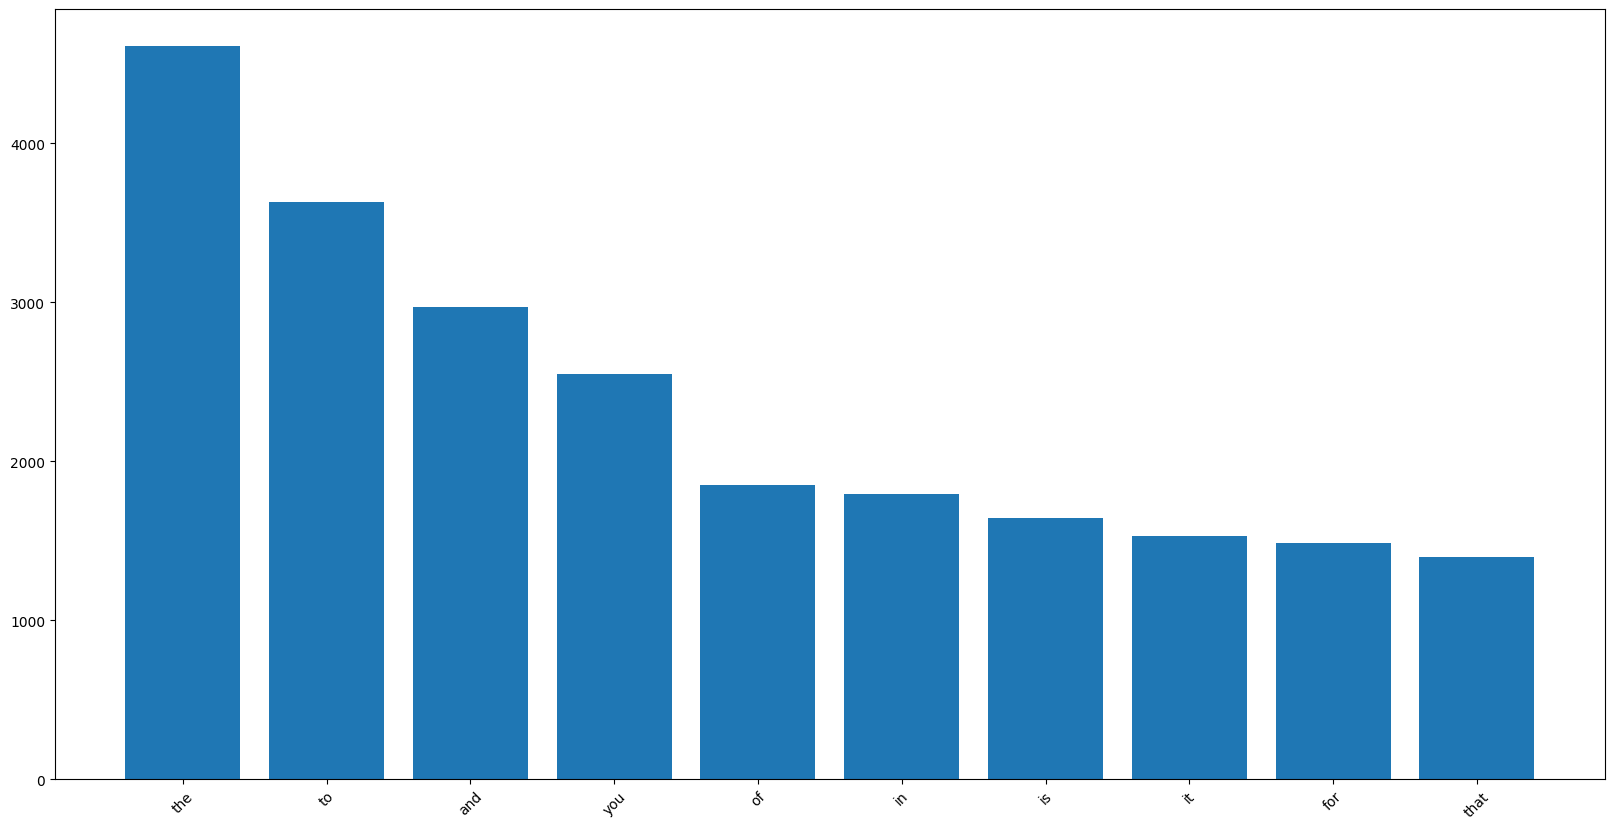

In [194]:
word_counts_uiuc = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts_uiuc.index, word_counts_uiuc.values)
plt.xticks(rotation=45)
plt.show()

In [195]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [196]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words_uiuc = vectorizer.fit_transform(uiuc['lemmatized_text'])
bag_of_words_uiuc

<4725x3882 sparse matrix of type '<class 'numpy.int64'>'
	with 49389 stored elements in Compressed Sparse Row format>

In [197]:
bow_df_uiuc = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_uiuc = bow_df_uiuc.sum()
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)
word_counts_uiuc

not          1205
like          534
people        481
good          389
time          376
             ... 
mask sick       3
marville        3
markdown        3
maps            3
luckily         3
Length: 3882, dtype: int64

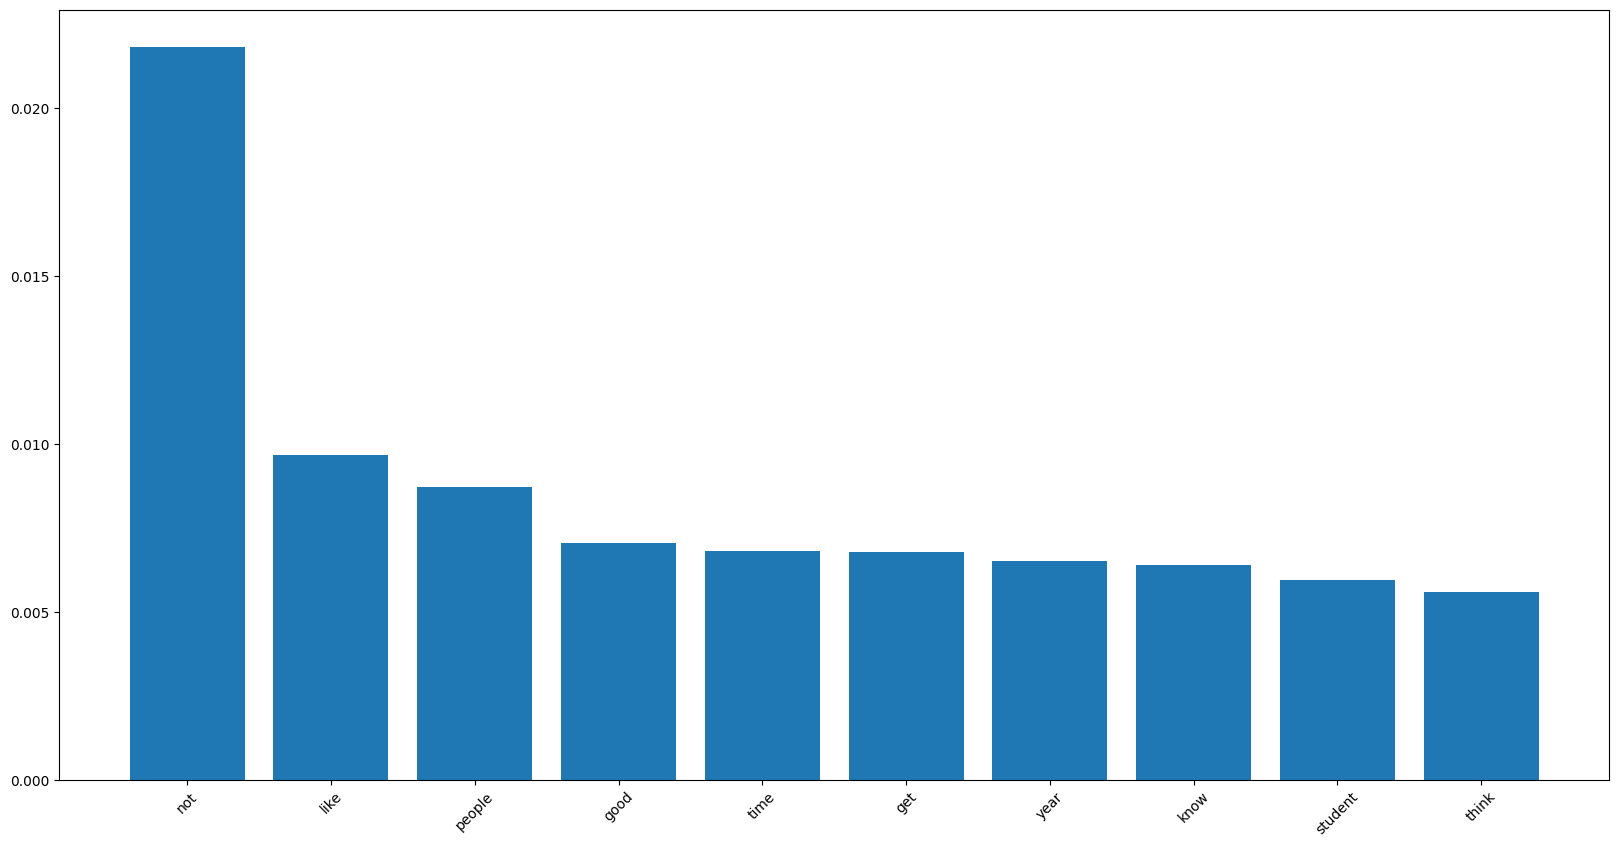

In [198]:
word_counts_uiuc = word_counts_uiuc / word_counts_uiuc.sum()
plot_list = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [199]:
my_plot_list_uiuc=word_counts_uiuc[['fire','difficult','english','fun','easy']]


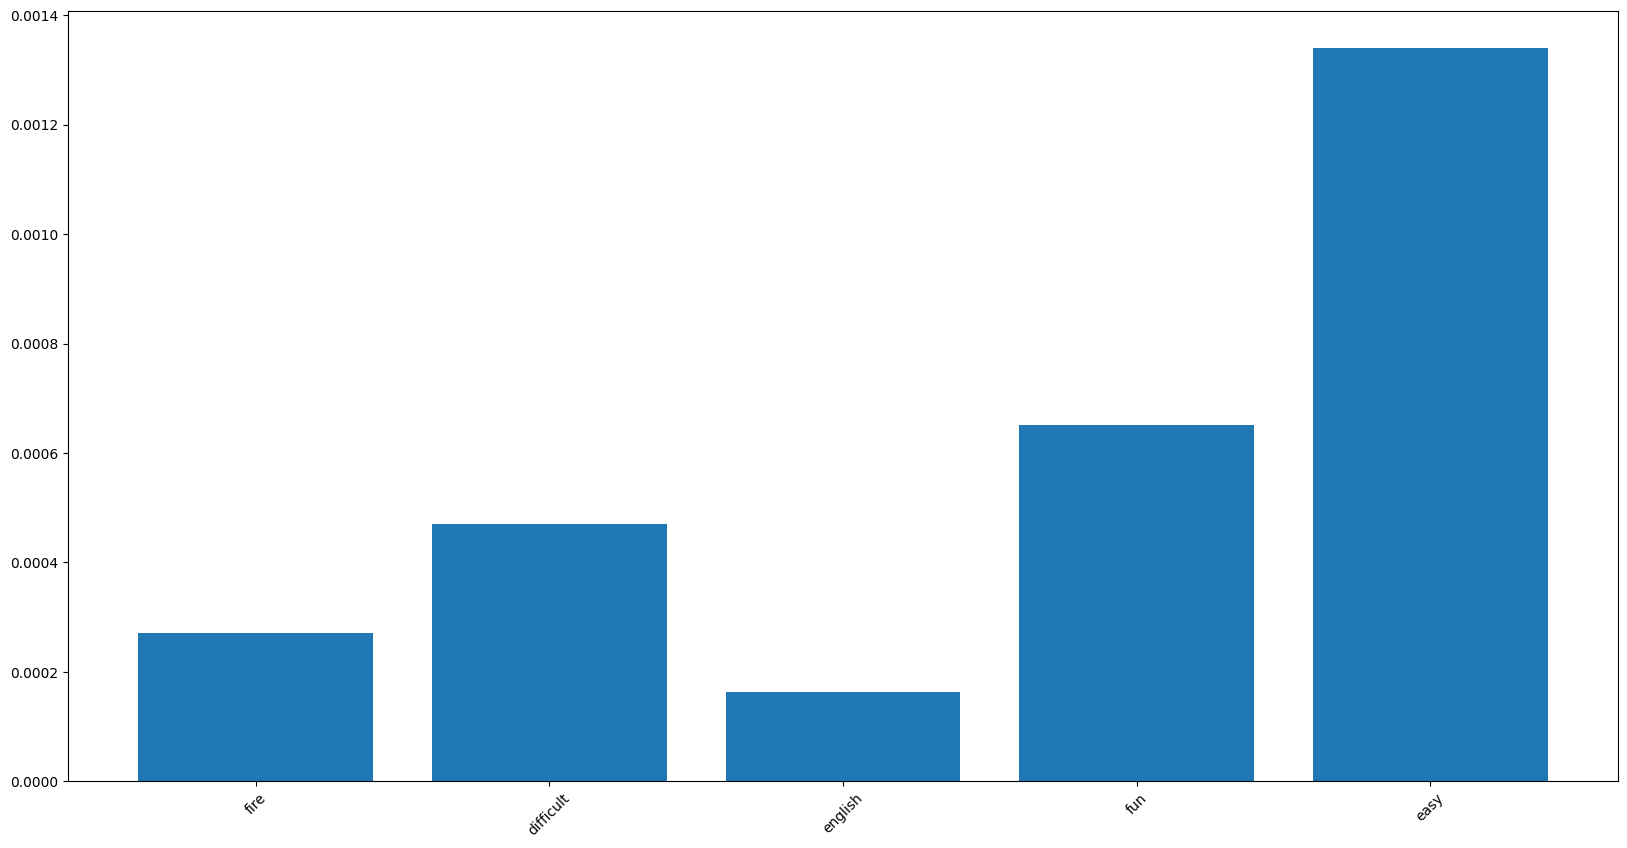

In [200]:
plt.figure(figsize=(20,10))
plt.bar(my_plot_list_uiuc.index, my_plot_list_uiuc.values)
plt.xticks(rotation=45)
plt.show()

# #My Responses to Part 2
The graphs that I made look very similar. The information from reddit shows that the Michigan sub-reddit is pretty much twice the size of the Illinois one. When comparing the relative freqeuncy of the words I chose, fire and difficult appear pretty much the same amount. However, English appears about 2-s times as much as it did in the Michigan reddit. Fun appears where less in the Illinois reddit as compared to the Michicagn reddit and easy appears way more in the Illinois as compared to the Michigan reddit. However, when comparing just the top 10 most commonly used words, they appear to very similar in their relative frequency. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [201]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [202]:
print(data.columns)

Index(['Unnamed: 0', 'date', 'post_votes', 'text', 'user', 'com_votes',
       'label'],
      dtype='object')


In [203]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
print(data.head())

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

   Unnamed: 0                 date  post_votes  \
0           0  2024-09-04 14:43:40           2   
1           1  2024-09-04 14:43:40           2   
2           2  2024-09-04 12:52:08           3   
3           3  2024-09-04 12:52:08           3   
4           4  2024-09-04 12:52:08           3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text  \
0                                                                                                                                                            Have the same professor! And in lecture he did say we were gonna have to l

In [204]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words_data= vectorizer.fit_transform(data['cleaned_text'])
bag_of_words_data

<9450x16275 sparse matrix of type '<class 'numpy.int64'>'
	with 226325 stored elements in Compressed Sparse Row format>

In [205]:
#use sklearn to train a logistic regression model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create bow representation of the text
vectorizer = CountVectorizer(min_df=3, max_df=0.3,)
X = vectorizer.fit_transform(data["cleaned_text"])

#use sentiment as training labels
y = data["label"]

#split the data into training and testing
#testing is hidden from the model during training
#verify that your model can work on new data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
#higher max_iter is always better, but depends on your computer power
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

#use trained value to see performance
y_pred = model.predict(X)

#print accuracy (% of unseen reviews guessed correctly)
accuracy_score(y, y_pred)

0.8898412698412699

In [206]:
#report the accuracy of the model


The accuracy of the model is very high. it is almost 89%. This means that using the cleaned text we can accurately predict 89% of the labels, or which schools reddit the comment came from.

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [207]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your bag-of-words representation and 'y' is your label column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6989


In [208]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 


The accuracy of the split data is much lower than the non-split data. The non-split data had an accuracy of 89% compared to 69% accuracy of the split data. I think that this is because there is 20% more data that the model is trained on. Also, there could be data in this test set that is almost an outlier that the model cannot predict accurately, causing a decrease in accuracy for the split train-test model.

#### Part 3: Examine the top features of your model using the following code

In [209]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


Michigan is much more associated with negatie words and UIUC is more associated with positive words. Honestly, I think that this is expected as Michigan is known as a hard school. Why is 'texas' in the list of the most negative words that has data from Michigan and UIUC? Also, there are some positive words relating to RSO and activites at UIUC.

In [210]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
print(top_10_negative)
print(top_10_positive)

       feature  coefficient
3183     mcard    -1.712525
1383      diag    -1.779924
3085       lsa    -1.783582
5752  waitlist    -1.843154
5294     texas    -1.901734
224        ann    -1.921920
5549        um    -1.943105
5551     umich    -2.415956
2083    fresno    -2.446842
3251  michigan    -2.938222
         feature  coefficient
5546        uiuc     2.571122
2564    illinois     2.175790
821    champaign     2.076800
4513        rsos     1.947972
2240    grainger     1.944649
5636      urbana     1.843485
2261       green     1.806040
2563      illini     1.713645
1257    danville     1.677539
481   basketball     1.631034


In [211]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
# not explicitly, but it looks like the more positive words are relating to UIUC and the more negative words are relating to Michigan. The model itself does not differntialte between the 2 schools but there are 
#jsut tendencies that there are more positve words relating to UIUC and more negative words relating to Michigan.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [212]:
!pip install gensim

In [213]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [214]:
corpus

In [215]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

#show the topics
lda_model.print_topics()

[(0,
  '0.025*"for" + 0.022*"in" + 0.015*"of" + 0.014*"my" + 0.012*"it" + 0.012*"is" + 0.012*"thank" + 0.011*"aid" + 0.011*"that" + 0.010*"be"'),
 (1,
  '0.021*"of" + 0.018*"that" + 0.017*"it" + 0.015*"this" + 0.015*"they" + 0.013*"is" + 0.013*"my" + 0.013*"your" + 0.012*"people" + 0.012*"just"'),
 (2,
  '0.033*"it" + 0.017*"of" + 0.015*"they" + 0.015*"on" + 0.014*"is" + 0.014*"in" + 0.014*"are" + 0.013*"for" + 0.013*"if" + 0.013*"not"'),
 (3,
  '0.030*"for" + 0.021*"in" + 0.018*"if" + 0.015*"is" + 0.013*"be" + 0.013*"of" + 0.012*"have" + 0.011*"it" + 0.011*"your" + 0.011*"are"'),
 (4,
  '0.031*"it" + 0.026*"in" + 0.019*"was" + 0.017*"be" + 0.015*"of" + 0.013*"on" + 0.012*"that" + 0.011*"but" + 0.009*"so" + 0.008*"for"'),
 (5,
  '0.022*"of" + 0.018*"but" + 0.018*"it" + 0.017*"in" + 0.016*"is" + 0.015*"that" + 0.013*"on" + 0.013*"my" + 0.012*"if" + 0.012*"as"'),
 (6,
  '0.038*"of" + 0.030*"in" + 0.023*"that" + 0.019*"is" + 0.017*"are" + 0.013*"they" + 0.012*"or" + 0.012*"for" + 0.012*"n

In [218]:
import pandas as pd

def get_dominant_topic(lda_model, corpus):
    topic_results = []
    for i, row in enumerate(lda_model[corpus]):
        sorted_topics = sorted(row, key=lambda x: x[1], reverse=True)  # Sort topics by probability
        dominant_topic = sorted_topics[0][0]  # Get the most probable topic
        topic_results.append(dominant_topic)
    return topic_results

# Assign the dominant topic to each comment
data['dominant_topic'] = get_dominant_topic(lda_model, corpus)

# Print a few high-frequency comments for each topic
for topic_num in range(10):  # Loop through all topics
    print(f"\n--- Topic {topic_num} ---")
    topic_comments = data[data['dominant_topic'] == topic_num]['cleaned_text'].head(5)  # Get top 5 comments for each topic
    for comment in topic_comments:
        print(comment)


--- Topic 0 ---
is there a lower limit for that i have some illini cash left over from last year though it is less than 
bookstor

teleport
httpskcsaillinoiseduhttpskcsaillinoisedu

--- Topic 1 ---
fed although its not like they would need to do any undercover work to figure this shit out lol
practice
whats this
do you have questions after reading about the rso
love that some things never change about engineers

--- Topic 2 ---
do you find it helpful to still go to the lecture it seems to me that his slides are embedded with mistakes here and there it makes it more confusing for me to understand him
purchasing illini cash should get you added to the nonresident meal plan card access level these generally allow you access to whatever is considered the front door of the residence hall with access to the dining hall at par that would be the doors facing the bus stop on the south side of the building only the mag stripe reader will work prox access in most of the residence halls is curren

The LDA model is taking 10 topics of groups of words that are associated with eachother, like a common theme. I used AI for the last python cell as I was having trouble printing out the 10 topics on my own.
Topic 0 seems to be talking about purchasing stuff at the illini bookstore or dinning halls.
Topic 1 seems to be all over the place. Maybe it is talking about the social aspects of UIUC.
Topic 2 seeems to talk about lectures and dealing with adminstrative staff on campus.
Topic 3 seems to talk about a specific class or professor and how students found outside resources to help them in the class.
These topics are generally pretty scattered and all have generic words. But you can sort of break it down based on if it is dealing with classroom stuff, logistics of being on campus and whatnot.